In [4]:
import utils
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import pickle

In [5]:
representation_model = 'mobilenet_2'
trained_model = 'score_model_3.p'

In [6]:
conn = utils.get_conn()

In [7]:
sql = """
SELECT 
    b.file,
    b.model AS representation_model
FROM processed b
LEFT JOIN predictions c
    ON b.file = c.file
    AND b.model = c.representation_model
    AND c.trained_model = %(trained_model)s 
WHERE
    model = %(model)s
    AND c.file IS NULL  /* Only files that are not predicted yet */
"""
df = pd.read_sql(sql, conn, params={
    'model': representation_model,
    'model': representation_model,
})

In [8]:
print("Calculating predictions for {} unprocessed files.".format(df.index.size))

Calculating predictions for 0 unprocessed files.


In [20]:
def get_representations(df):
    files_as_df = []
    for ind, row in df.iterrows():
        data = pd.read_csv('data/{}/{}.csv'.format(row['representation_model'], row['file']), header=None)
        files_as_df.append(data)
    return pd.concat(files_as_df)

representations = get_representations(df)

In [21]:
model = pickle.load(open( "models/{}".format(trained_model), "rb" ))
features = np.arange(1,1001)   # mobilenet_2

df['prediction'] = model.predict_proba(representations[features])[:,1]

In [22]:
df

,file,representation_model,prediction
0,2019-05-18T06:57:24.238187.jpg,mobilenet_2,0.055698
1,2019-05-18T07:06:22.317327.jpg,mobilenet_2,0.045107
2,2019-05-18T07:39:16.255473.jpg,mobilenet_2,0.055166
3,2019-05-18T08:10:01.641858.jpg,mobilenet_2,0.056215
4,2019-05-18T06:50:42.655288.jpg,mobilenet_2,0.056986
5,2019-05-18T07:19:07.672193.jpg,mobilenet_2,0.053286
6,2019-05-18T06:50:59.953493.jpg,mobilenet_2,0.056707
7,2019-05-18T07:30:29.195567.jpg,mobilenet_2,0.054123
8,2019-05-18T07:14:27.770052.jpg,mobilenet_2,0.061914
9,2019-05-18T07:39:59.325505.jpg,mobilenet_2,0.056054


2019-05-18T08:15:59.136318.jpg
http://192.168.1.114:8888/files/diver_or_not/pics/2019-05-18T08:15:59.136318.jpg


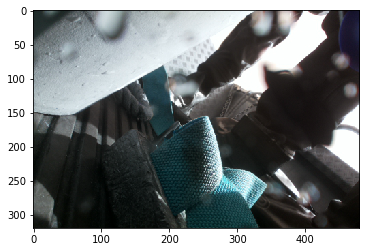

2019-05-18T07:01:58.000553.jpg
http://192.168.1.114:8888/files/diver_or_not/pics/2019-05-18T07:01:58.000553.jpg


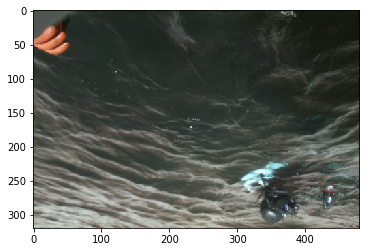

2019-05-18T07:48:52.270290.jpg
http://192.168.1.114:8888/files/diver_or_not/pics/2019-05-18T07:48:52.270290.jpg


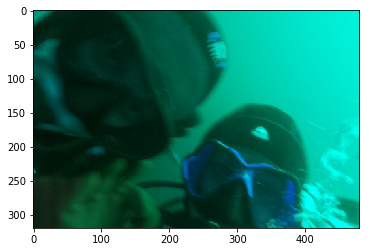

2019-05-18T07:08:28.998664.jpg
http://192.168.1.114:8888/files/diver_or_not/pics/2019-05-18T07:08:28.998664.jpg


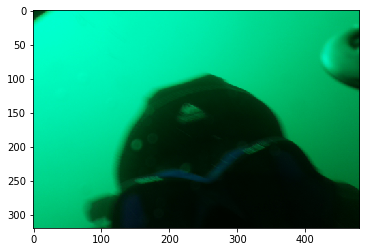

2019-05-18T07:05:05.836900.jpg
http://192.168.1.114:8888/files/diver_or_not/pics/2019-05-18T07:05:05.836900.jpg


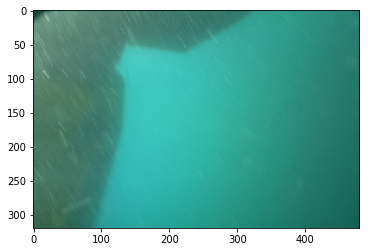

In [23]:
# Check best predictions
for ind, row in df.sort_values('prediction', ascending=False).head(5).iterrows():
    filename = row['file']
    print(row['file'])
    
    im = cv2.imread(utils.img_folder + filename)
    plt.imshow(im)
    print("http://192.168.1.114:8888/files/diver_or_not/{}{}".format(utils.img_folder, filename))
    plt.show()

In [24]:
# Store results to the database
df['trained_model'] = trained_model

In [25]:
df.sort_values('prediction')

,file,representation_model,prediction,trained_model
215,2019-05-18T08:23:49.998579.jpg,mobilenet_2,0.041126,score_model_2.p
547,2019-05-18T07:06:25.780982.jpg,mobilenet_2,0.041603,score_model_2.p
55,2019-05-18T07:06:04.991301.jpg,mobilenet_2,0.043184,score_model_2.p
1,2019-05-18T07:06:22.317327.jpg,mobilenet_2,0.045107,score_model_2.p
312,2019-05-18T07:07:00.413121.jpg,mobilenet_2,0.045369,score_model_2.p
499,2019-05-18T07:07:17.756948.jpg,mobilenet_2,0.045395,score_model_2.p
556,2019-05-18T07:06:32.708780.jpg,mobilenet_2,0.045414,score_model_2.p
395,2019-05-18T07:07:35.139205.jpg,mobilenet_2,0.046072,score_model_2.p
607,2019-05-18T07:05:54.559675.jpg,mobilenet_2,0.046236,score_model_2.p
492,2019-05-18T06:07:41.485647.jpg,mobilenet_2,0.046679,score_model_2.p


In [26]:
df.to_sql('predictions', conn, if_exists='append')

# Ad hoc

In [27]:
# pd.read_sql("select * from predictions where file is null", conn)

In [28]:
data = pd.read_sql("SELECT * FROM predictions", conn)

In [29]:
data['representation_model'].value_counts()

mobilenet_2    8813
Name: representation_model, dtype: int64

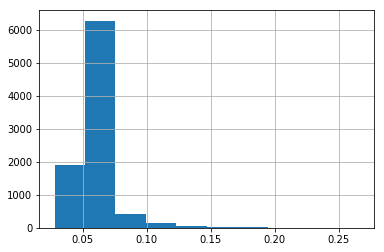

In [30]:
data['prediction'].hist()

In [31]:
data['file'].value_counts().max()

1

In [32]:
data[data['file'] == '2019-05-18T06:57:24.238187.jpg']

,index,file,representation_model,prediction,trained_model
8077,0,2019-05-18T06:57:24.238187.jpg,mobilenet_2,0.055698,score_model_2.p
